## Tensforwflow example with two hidden layers. The MNIST dataset

In [19]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show or hide your raw code."></form>
''')

### Import the relevant packages

In [2]:
import time
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfsd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

### Data

In [3]:
mnist_dataset,mnist_info=tfsd.load(name='mnist',with_info=True, as_supervised=True, shuffle_files=True)

### Train and test datasets

In [4]:
mnist_train,mnist_test = mnist_dataset['train'],mnist_dataset['test']
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

### Normalize train and test datasets

In [5]:
def scale(image,label):
    image=tf.cast(image,tf.float32)
    image/=255.
    return image,label

scaled_train_and_validation_data=mnist_train.map(scale)
scaled_test_data = mnist_test.map(scale)

## Q1: (hidden layer size)

## Model: Try a hidden layer size of 50

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
None
-------------------------------------------------------------


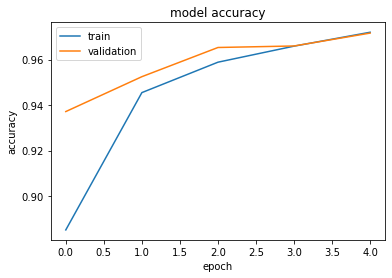

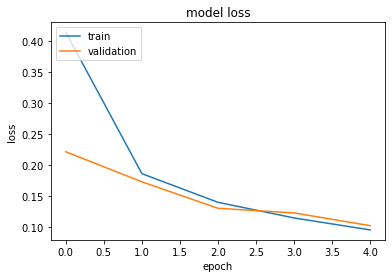

-------------------------------------------------------------
Train Accuracy = 0.972
Train Loss = 0.095
-------------------------------------------------------------
Validation Accuracy = 0.972
Validation Loss = 0.102
-------------------------------------------------------------
Test Accuracy = 0.970
Test Loss = 0.104
-------------------------------------------------------------
Taining Time = 7.903 second


In [6]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])


model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model0 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

## Model: Try a hidden layer size of 200

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
None
-------------------------------------------------------------


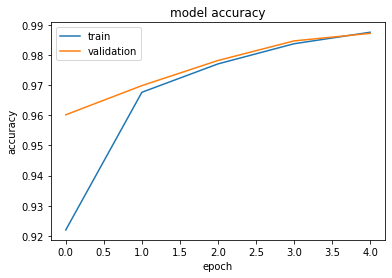

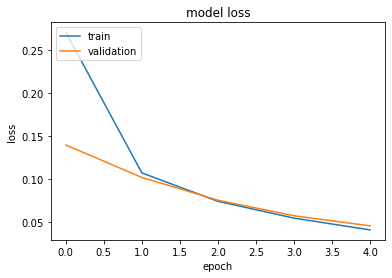

-------------------------------------------------------------
Train Accuracy = 0.988
Train Loss = 0.041
-------------------------------------------------------------
Validation Accuracy = 0.987
Validation Loss = 0.045
-------------------------------------------------------------
Test Accuracy = 0.976
Test Loss = 0.080
-------------------------------------------------------------
Taining Time = 7.000 second


In [7]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 200

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model1 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

## Model: Try a Custom hidden layer size

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None
-------------------------------------------------------------


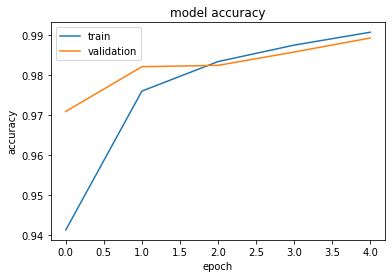

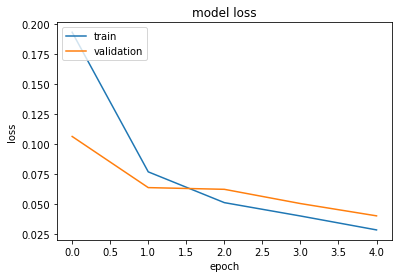

-------------------------------------------------------------
Train Accuracy = 0.991
Train Loss = 0.029
-------------------------------------------------------------
Validation Accuracy = 0.989
Validation Loss = 0.040
-------------------------------------------------------------
Test Accuracy = 0.979
Test Loss = 0.073
-------------------------------------------------------------
Taining Time = 7.385 second


In [8]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model1_2 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

## Answering Q1: (hidden layer size)

### 1. Try a hidden layer size of 200. How does the validation accuracy of the model change? What about the    time it took the algorithm to train? Can you find a hidden layer size that does better?
----
### How does the validation accuracy of the model change?
### When increase the hidden layer from 50 to 200, the validation accuracy also increased from 0.970 to 0.988
----
### What about the time it took the algorithm to train?
### Train time increased from 7.396 to 7.856 seconds
----
###  Can you find a hidden layer size that does better?
### hidden layer size = 1000,   I can notice that increasing the hidden layer is increaseing the  validation accuracy and testing accuracy, but if you keep increasing hidden layer more than 1000 the accuracy almost the same but the training time increaseing, until you the model will overfit and the accuracy will start in increaseing.


## Q2: (The Depth of hidden layers)

## Model: Add another hidden layer 

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 2,797,010
Trainable params: 2,797,010
Non-trainable params: 0
_____________________________________________

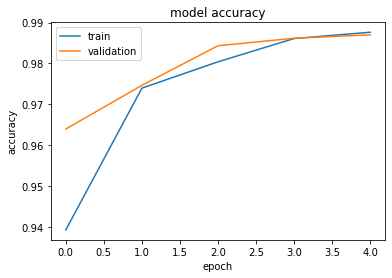

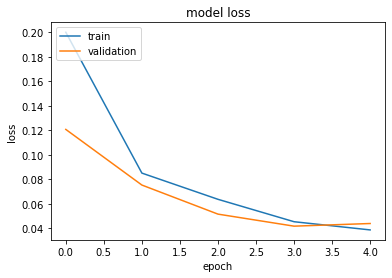

-------------------------------------------------------------
Train Accuracy = 0.988
Train Loss = 0.039
-------------------------------------------------------------
Validation Accuracy = 0.987
Validation Loss = 0.044
-------------------------------------------------------------
Test Accuracy = 0.980
Test Loss = 0.080
-------------------------------------------------------------
Taining Time = 7.768 second


In [9]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model2 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

## Answering Q2: (The Depth of hidden layers)


### 2. The *depth* of the algorithm. Add another hidden layer to the algorithm. This is an extremely important exercise! How does the validation accuracy change? What about the time it took the algorithm to train? 
----

##  How does the validation accuracy change?
###  When Adding another hidden layer, the validation accuracy decreased from 0.987 to 0.982
----

## What about the time it took the algorithm to train? 
### Train time increased from 7.678 to 8.179 seconds


## Q3: (Width and Depth  of the Model)
## Model: (5 Hidden layers, 1000 width)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              

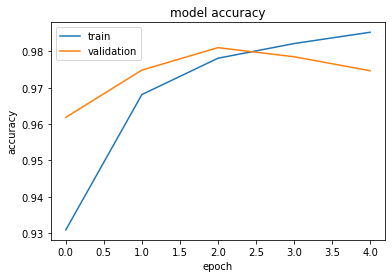

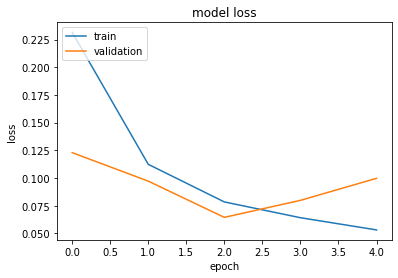

-------------------------------------------------------------
Train Accuracy = 0.985
Train Loss = 0.053
-------------------------------------------------------------
Validation Accuracy = 0.975
Validation Loss = 0.100
-------------------------------------------------------------
Test Accuracy = 0.964
Test Loss = 0.136
-------------------------------------------------------------
Taining Time = 8.959 second


In [10]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model3 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

### 3. The *width and depth* of the algorithm. Add as many additional layers as you need to reach 5 hidden layers. Moreover, adjust the width of the algorithm as you find suitable. How does the validation accuracy change? What about the time it took the algorithm to train?
----
### How does the validation accuracy of the model change?
### When use (5 hidden layers, 1000 width) the validation accuracy also increased from 0.982 to 0.987.
----
### What about the time it took the algorithm to train?
### Train time increased from 8.179 to 9.193 seconds


## Q4: (Fiddle with the activation functions.)
## Model: (use Sigmoid Activation Funcation)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_23 (Dense)             (None, 1000)              

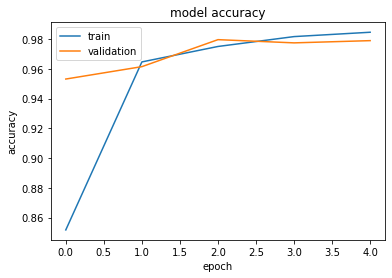

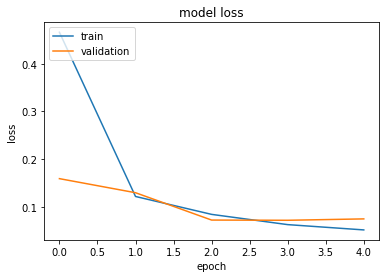

-------------------------------------------------------------
Train Accuracy = 0.985
Train Loss = 0.051
-------------------------------------------------------------
Validation Accuracy = 0.979
Validation Loss = 0.075
-------------------------------------------------------------
Test Accuracy = 0.973
Test Loss = 0.097
-------------------------------------------------------------
Taining Time = 8.934 second


In [11]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='sigmoid'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='sigmoid'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model4 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))

### 4. Fiddle with the activation functions. Try applying sigmoid transformation to bothlayers. The sigmoid activation is given by the string 'sigmoid'.
----
### How does the validation accuracy of the model change?
### use Sigmoid in 2 hidden layers, the validation accuracy also decreased from 0. 987 to 0.986. Test Accuracy decreased  from 0.979 to 0.977
----
### What about the time it took the algorithm to train?
### Train time decreased from 9.193 to 9.190  seconds


## Q5: (Fiddle with the activation functions.)
## Model: (use Tanh Activation Funcation)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_26 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_27 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              

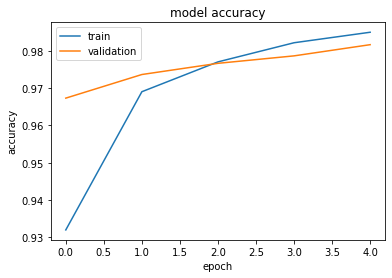

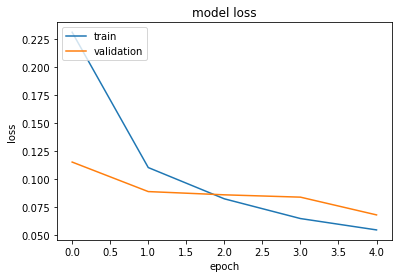

-------------------------------------------------------------
Train Accuracy = 0.985
Train Loss = 0.055
-------------------------------------------------------------
Validation Accuracy = 0.982
Validation Loss = 0.068
-------------------------------------------------------------
Test Accuracy = 0.975
Test Loss = 0.103
-------------------------------------------------------------
Taining Time = 8.911 second


In [12]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='tanh'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model5 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))



### 5. Fiddle with the activation functions. Try applying sigmoid transformation to bothlayers. The sigmoid activation is given by the string 'sigmoid'.
----
### How does the validation accuracy of the model change?
### use Sigmoid in 2 hidden layers, the validation accuracy also decreased from 0.986 to 0.980. Test Accuracy decreased  from 0.977 to 0.972
----
### What about the time it took the algorithm to train?
### Train time increased from 9.190 to  9.380 seconds

## Q6: (Adjust the batch size)
## Model: (use batch size 10000)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 10000, NUM_EPOCHS = 5
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_34 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_35 (Dense)             (None, 1000)            

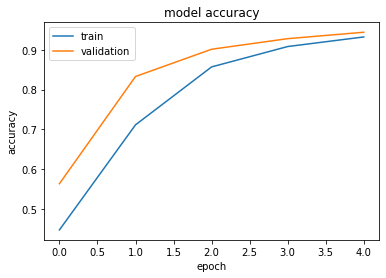

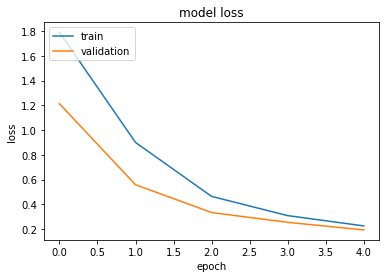

-------------------------------------------------------------
Train Accuracy = 0.933
Train Loss = 0.226
-------------------------------------------------------------
Validation Accuracy = 0.945
Validation Loss = 0.194
-------------------------------------------------------------
Test Accuracy = 0.940
Test Loss = 0.189
-------------------------------------------------------------
Taining Time = 6.075 second


In [13]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=10000
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model6 = model

print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))



### 6. Adjust the batch size. Try a batch size of 10000. How does the required time change? What about the accuracy?
----
### How does the required time change?
### Train time decreased from 9.193 to 6.044  seconds
----
### What about the accuracy?
### validation Accuracy decreased from 0.987 to 0.948, Test Accuracy decreased from 0.979 to 0.945, 


## Q7: (Adjust the batch size)
## Model: (use batch size 1)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 1, NUM_EPOCHS = 5
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_39 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_40 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_41 (Dense)             (None, 1000)              10

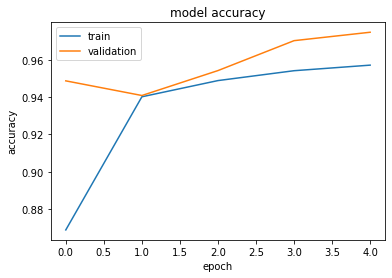

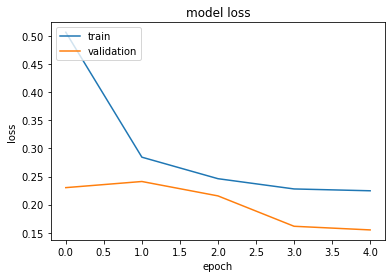

-------------------------------------------------------------
Train Accuracy = 0.957
Train Loss = 0.225
-------------------------------------------------------------
Validation Accuracy = 0.975
Validation Loss = 0.155
-------------------------------------------------------------
Test Accuracy = 0.969
Test Loss = 0.201
-------------------------------------------------------------
Taining Time = 449.658 second


In [14]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=1
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model7 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))



### 7. Adjust the batch size. Try a batch size of 1. How does the required time change? What about the accuracy?
----
### How does the required time change?
### Train time significantly Increased from 9.193 to 449.6  seconds
----
### What about the accuracy?
### validation Accuracy significantly decreased from 0.987 to 0.975 . , Test Accuracy decreased from 0.979 to 0.969.



## Q8: (Adjust the Learning rate)
## Model: (use Learning rate 0.0001)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 1000, NUM_EPOCHS = 5
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_44 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_45 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_46 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_47 (Dense)             (None, 1000)             

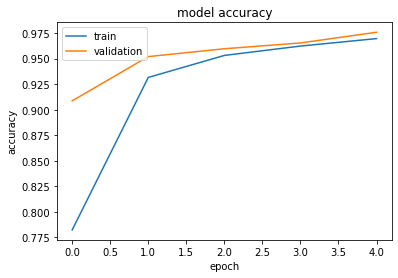

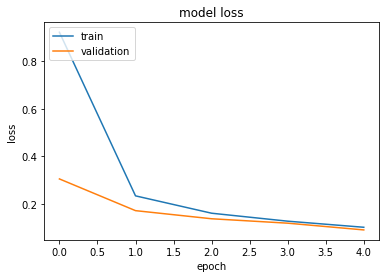

-------------------------------------------------------------
Train Accuracy = 0.970
Train Loss = 0.102
-------------------------------------------------------------
Validation Accuracy = 0.976
Validation Loss = 0.091
-------------------------------------------------------------
Test Accuracy = 0.967
Test Loss = 0.105
-------------------------------------------------------------
Taining Time = 7.548 second


In [15]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=1000
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model8 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))


### 8.  Adjust the learning rate. Try a value of 0.0001. Does it make a difference?
----
### Does it make a difference?
### Hint :  default learning rate is 0.01
###  validation Accuracy decreased from 0.987 to 0.976, testing Accuracy also  decreased from 0.979 to 0.967
----

----

## Q9: (Adjust the Learning rate)
## Model: (use Learning rate 0.02)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 5
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_50 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_51 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_52 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_53 (Dense)             (None, 1000)             

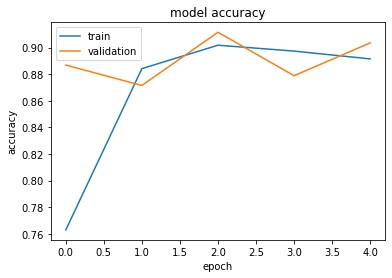

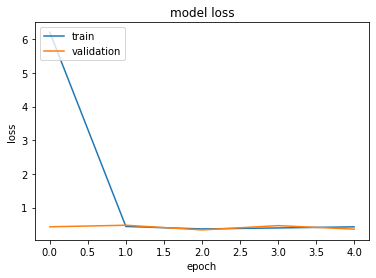

-------------------------------------------------------------
Train Accuracy = 0.891
Train Loss = 0.429
-------------------------------------------------------------
Validation Accuracy = 0.904
Validation Loss = 0.362
-------------------------------------------------------------
Test Accuracy = 0.901
Test Loss = 0.370
-------------------------------------------------------------
Taining Time = 10.235 second


In [16]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=5
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model9 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))


### 9.  Adjust the learning rate. Try a value of 0.02. Does it make a difference?
----
### Does it make a difference?
### Hint :  default learning rate is 0.01
### validation Accuracy decreased from 0.987 to 0.904, testing Accuracy also  decreased from 0.979 to 0.901
----

----

## Q10: (Combining all together)
## Model: (Customized)

-------------------------------------------------------------
HyperParamters:
BUFFER SIZE =10000, BATCH SIZE = 100, NUM_EPOCHS = 50
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_62 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_63 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_64 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_65 (Dense)             (None, 600)             

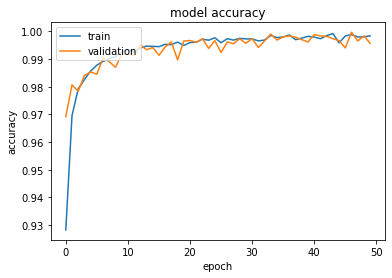

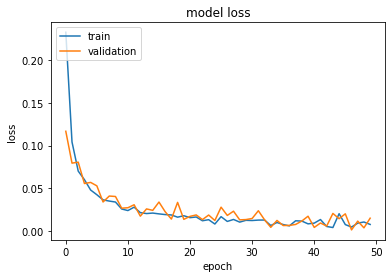

-------------------------------------------------------------
Train Accuracy = 0.998
Train Loss = 0.008
-------------------------------------------------------------
Validation Accuracy = 0.996
Validation Loss = 0.015
-------------------------------------------------------------
Test Accuracy = 0.982
Test Loss = 0.145
-------------------------------------------------------------
Taining Time = 78.653 second


In [18]:
# Shuffle Train dataset ang separate train and validation samples
BUFFER_SIZE=10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Prepare for batching
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

input_size = 784
output_size = 10
hidden_layer_size = 600

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


NUM_EPOCHS=50
start = time.time()
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=False)
stop = time.time()
model10 = model
print("-------------------------------------------------------------")
print('HyperParamters:') 
print('BUFFER SIZE =' + str(BUFFER_SIZE) + ', BATCH SIZE = ' + str(BATCH_SIZE) + ', NUM_EPOCHS = ' + str(NUM_EPOCHS))
print(model.summary())
print("-------------------------------------------------------------")
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("-------------------------------------------------------------")
print('Train Accuracy = ' + str("{:.3f}".format(model.history.history['accuracy'][-1])))
print('Train Loss = '     + str("{:.3f}".format(model.history.history['loss'][-1])))
print("-------------------------------------------------------------")
print('Validation Accuracy = ' + str("{:.3f}".format(model.history.history['val_accuracy'][-1])))
print('Validation Loss = '     + str("{:.3f}".format(model.history.history['val_loss'][-1])))
print("-------------------------------------------------------------")
test_loss,test_accuracy=model.evaluate(test_data,verbose=False)
print('Test Accuracy = ' + str("{:.3f}".format(test_accuracy)))
print('Test Loss = '     + str("{:.3f}".format(test_loss)))
print("-------------------------------------------------------------")
print("Taining Time = " + str("{:.3f}".format(stop - start) + " second"))


# Final Model
### Validation Accuracy = 0.998
### Test Accuracy = 0.982

In [21]:
# #  "Accuracy"
# plt.plot(model1.history.history['accuracy'])
# plt.plot(model1_2.history.history['accuracy'])
# plt.plot(model2.history.history['accuracy'])
# plt.plot(model3.history.history['accuracy'])
# plt.plot(model4.history.history['accuracy'])
# plt.plot(model5.history.history['accuracy'])
# plt.plot(model6.history.history['accuracy'])
# plt.plot(model7.history.history['accuracy'])
# plt.plot(model8.history.history['accuracy'])
# plt.plot(model9.history.history['accuracy'])
# plt.plot(model10.history.history['accuracy'])
 
# plt.title('Models accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Q1', 'Q1_2', 'Q2','Q3', 'Q4', 'Q5','Q6', 'Q7', 'Q8', 'Q9', 'Q10'], loc='upper left')
# plt.show()

# #  "Validation - accuracy"
# plt.plot(model1.history.history['val_accuracy'])
# plt.plot(model1_2.history.history['val_accuracy'])
# plt.plot(model2.history.history['val_accuracy'])
# plt.plot(model3.history.history['val_accuracy'])
# plt.plot(model4.history.history['val_accuracy'])
# plt.plot(model5.history.history['val_accuracy'])
# plt.plot(model6.history.history['val_accuracy'])
# plt.plot(model7.history.history['val_accuracy'])
# plt.plot(model8.history.history['val_accuracy'])
# plt.plot(model9.history.history['val_accuracy'])
# plt.plot(model10.history.history['val_accuracy'])
 
# plt.title('models val-accuracy')
# plt.ylabel('val-accuracy')
# plt.xlabel('epoch')
# plt.legend(['Q1', 'Q1_2', 'Q2','Q3', 'Q4', 'Q5','Q6', 'Q7', 'Q8', 'Q9', 'Q10'], loc='upper left')
# plt.show()

# #  "Loss"
# plt.plot(model1.history.history['loss'])
# plt.plot(model1_2.history.history['loss'])
# plt.plot(model2.history.history['loss'])
# plt.plot(model3.history.history['loss'])
# plt.plot(model4.history.history['loss'])
# plt.plot(model5.history.history['loss'])
# plt.plot(model6.history.history['loss'])
# plt.plot(model7.history.history['loss'])
# plt.plot(model8.history.history['loss'])
# plt.plot(model9.history.history['loss'])
# plt.plot(model10.history.history['loss'])

# plt.title('Models loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['Q1', 'Q1_2', 'Q2','Q3', 'Q4', 'Q5','Q6', 'Q7', 'Q8', 'Q9', 'Q10'], loc='upper left')
# plt.show()

KeyError: 'accuracy'